# Will You Top the Leaderboard? (2024.10.11)

link: https://thefiddler.substack.com/p/will-you-top-the-leaderboard

## I. Puzzle

You’re doing a 30-minute workout on your stationary bike. There’s a live leaderboard that tracks your progress, along with the progress of everyone else who is currently riding, measured in units of energy called kilojoules. (For reference, one kilojoule is 1000 Watt-seconds.) Once someone completes their ride, they are removed from the leaderboard.

Suppose many riders are doing the 30-minute workout right now, and that they all begin at random times. Further suppose that they are burning kilojoules at different constant rates (i.e., everyone is riding at constant power) that are uniformly distributed between 0 and 200 Watts.

Halfway through (i.e., 15 minutes into) your workout, you notice that you’re exactly halfway up the leaderboard. How far up the leaderboard can you expect to be as you’re finishing your workout?

As an added bonus problem (though not quite Extra Credit), what’s the highest up the leaderboard you could expect to be 15 minutes into your workout?

# II. Solution

Given that there is a large number of riders and that the starting time and the individual burning rates are uniformly distributed overtime, the distribution of the energy (or leader board) should be nearly the same at any given time. To estimate our position after 30 min., we will first estimate  the cumulative distribution function of the energy level with a monte carlo simulation.

 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
n_samples = 20000000

# random variables
burning_rate = np.random.uniform(0, 0.2, n_samples) # in [kWatt]
time = np.random.uniform(0, 1800, n_samples) # in [sec]

energy = np.sort(burning_rate * time) # in [kJoule]

median = np.median(energy)
expected_position = np.count_nonzero(energy<median*2)/ np.size(energy)
 
print(f'Median: {median:.3f}; Target energy: {median*2:.3f}; expected relative position: {expected_position:.3f}')



Median: 67.232; Target energy: 134.464; expected relative position: 0.741


If we are halfway up the leader board after 15 minutes, the expected energy level at that time will be 67,198 kJoule. Therefore the energy level after 30 minutes will be 134,395 kJoule and we will have an higher energy level than 74,1% of the other riders.   

**Bonus**:  What’s the highest up the leaderboard you could expect to be 15 minutes into your workout?

In [5]:
full_throttle_rider = np.count_nonzero(energy<180)/ np.size(energy)
print(f'Expected relative position: {full_throttle_rider:.3f}')

Expected relative position: 0.847


If we cycle with maxmimum power (200 watt), our energy level after 15 minuntes will be $0.2 \cdot 900 = 180$ kJoule and we will have an higher energy level than 84,7% of the other riders.   

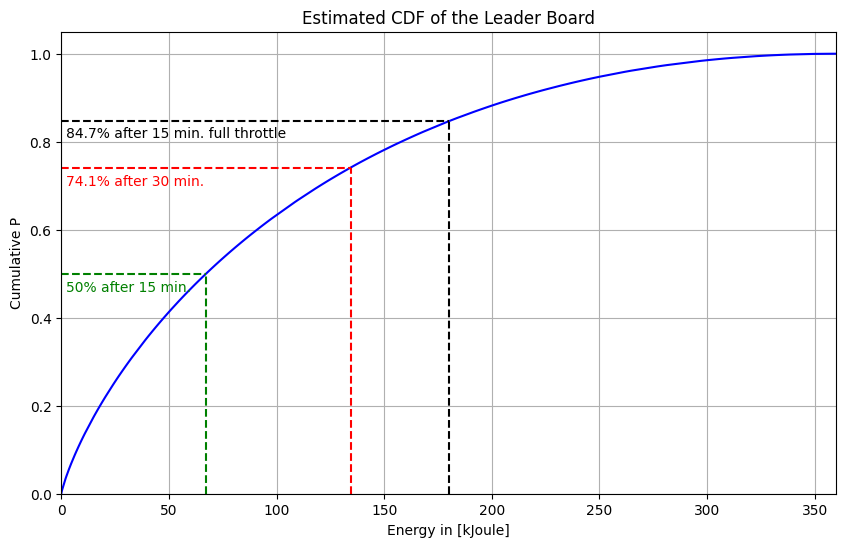

In [6]:
cdf = np.linspace(0, 1, n_samples)

plt.figure(figsize=(10, 6))
plt.plot(energy, cdf, color='blue')

# plot median
plt.plot([0,median], [0.5, 0.5], color='green', linestyle='--')
plt.plot([median, median], [0,0.5], color='green', linestyle='--')
plt.annotate(f'50% after 15 min.',(2,0.46),color='green')

# plot expected position
expected_position = np.count_nonzero(energy<median*2)/np.size(energy)
plt.plot([0,median*2], [expected_position, expected_position], color='red', linestyle='--')
plt.plot([median*2, median*2], [0,expected_position], color='red', linestyle='--')
plt.annotate(f'{100*expected_position:.1f}% after 30 min.',(2,0.7),color='red')

# plot full_throttle_rider
plt.plot([0,180], [full_throttle_rider, full_throttle_rider], color='black', linestyle='--')
plt.plot([180,180], [0,full_throttle_rider], color='black', linestyle='--')
plt.annotate(f'{100*full_throttle_rider:.1f}% after 15 min. full throttle',(2,0.81),color='black')

# plot
plt.title("Estimated CDF of the Leader Board", fontsize=12)
plt.xlabel("Energy in [kJoule]", fontsize=10)
plt.ylabel("Cumulative P", fontsize=10)
plt.xlim(0, 360)
plt.ylim(0,1.05)
plt.grid(True)
plt.show()
